### Stock Price Predictor 

In this project, we will work on a time series problem or I can say regression problem which is a Stock Price Prediction, We will Predict the stock prices of Natural Gas.  
You can work on any.  

Requirements:- 

- You should be familiar with Linear Regression  
- You should be familiar with Support Vector Machine   

In this project, we will develop our stock price predictor using only these two predictors. In research papers, SVM, Regression algorithms  works best as compared to any other machine learning algorithms, ofc ensembling learning, stacking will work which we will study in details in further sections.  
So, let's get started with this project. 

Before you get started, be sure you have downloaded the following package:- 
```Python 
pip install yfinance 
``` 

ONLY for Educational Purpose Predicting Stock Prices requires taking into account a lot of factors such as technical indicators and fundamental indicators. In this notebook i have given just a glimpse of that.

In [1]:
# !pip install yfinance

In [2]:
import numpy as np 
import pandas as pd   

import yfinance as yf 

import seaborn as sns 
import matplotlib.pyplot as plt   
%matplotlib inline 

In [3]:
stocks = input("Enter the code of the stock:- ") 
data = yf.download(stocks, "2008-01-01", "2023-02-16", auto_adjust=True) 
data.head()

Enter the code of the stock:- NG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [4]:
data.shape 

(3809, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3809 entries, 2008-01-02 to 2023-02-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3809 non-null   float64
 1   High    3809 non-null   float64
 2   Low     3809 non-null   float64
 3   Close   3809 non-null   float64
 4   Volume  3809 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 178.5 KB


In [6]:
data.describe()

,Open,High,Low,Close,Volume
count,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000
mean,3.900822,3.988548,3.809006,3.893933,130363.576004
std,1.903093,1.953758,1.848331,1.898292,54128.299291
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.731000,2.778000,2.681000,2.728000,91920.000000
50%,3.437000,3.504000,3.354000,3.429000,125222.000000
75%,4.355000,4.428000,4.264000,4.347000,160163.000000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


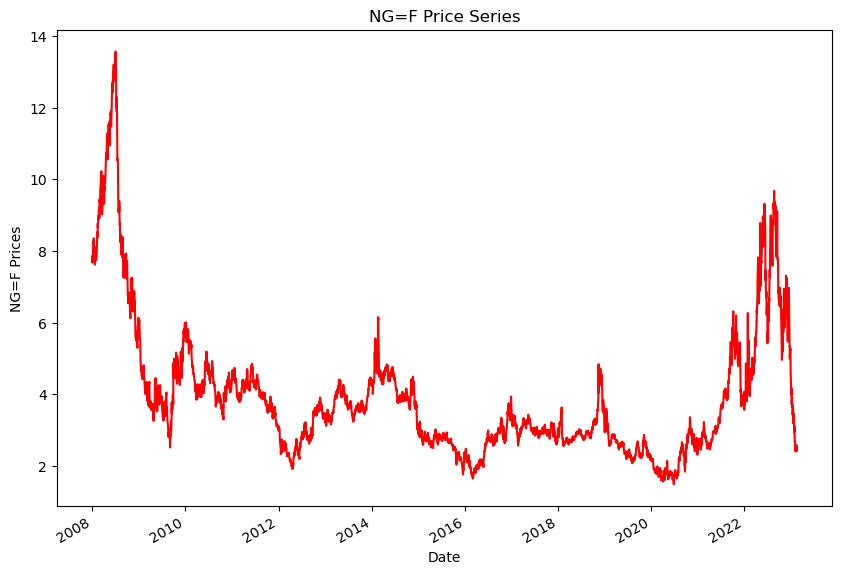

In [7]:
data.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

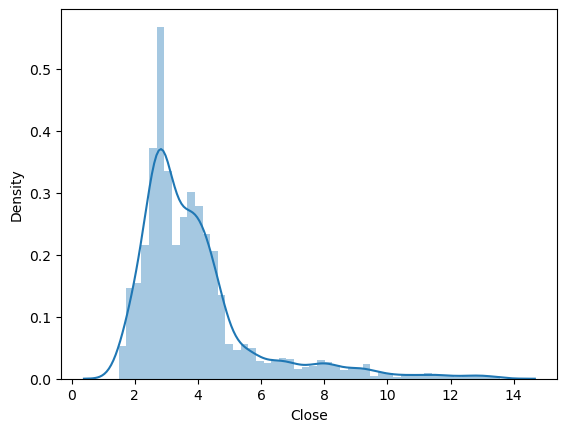

In [8]:
sns.distplot(data["Close"])

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

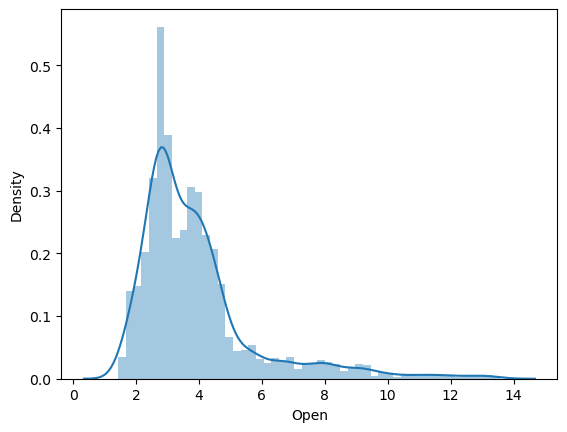

In [9]:
sns.distplot(data["Open"])

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

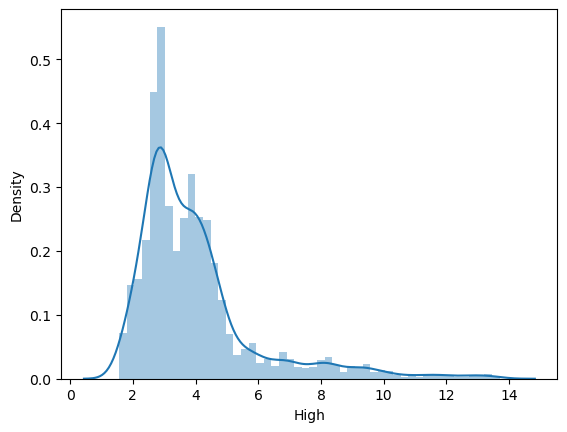

In [10]:
sns.distplot(data["High"])

In [11]:
# Conlusions  

# - Shape the of the data  
# - how our data is distributed 
# - It's very very non linear  

# Linear, Logistic, Regularized, SVM 

X = data.drop("Close", axis=1) 
y = data["Close"] 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=0) 
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(3047, 4)
(762, 4)
(3047,)
(762,)


In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 
lr.fit(X_train, y_train) 
pred1 = lr.predict(X_test)

In [13]:
# MSE -- > Mean Squared Error
# RMSE ---> sqrt(MSE) 
# r2_square ---> 1.0 # good model 

from sklearn.metrics import mean_squared_error, r2_score 


def calculate_metrics(y_test, y_pred):  
    ''' 
    y_test:- ground truth
    y_pred:- model predict value
    '''
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2_scors = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("R2_score:- ", r2_scors) 
    
calculate_metrics(y_test, pred1)

MSE:-  0.002669966150134637
RMSE:-  0.051671715184756904
R2_score:-  0.9992374854240829


In [14]:
from sklearn.linear_model import Lasso, Ridge 

la = Lasso().fit(X_train, y_train )
ri = Ridge().fit(X_train, y_train ) 

la_p = la.predict(X_test) 
ri_p = ri.predict(X_test)

In [15]:
calculate_metrics(y_test, la_p)

MSE:-  0.2785478274671294
RMSE:-  0.5277763043820075
R2_score:-  0.9204496362161652


In [16]:
calculate_metrics(y_test, ri_p)

MSE:-  0.0027517145586306345
RMSE:-  0.05245678753632017
R2_score:-  0.9992141389284604


In [17]:
# Support Vector Machine
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

svr = SVR() 


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.080 total time=   0.5s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.094 total time=   0.4s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.039 total time=   0.4s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.058 total time=   0.4s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.061 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.079 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.093 total time=   0.4s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.038 total time=   0.4s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.057 total time=   0.4s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.061 total time=   0.4s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.078 total time=   0.4s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   0.6s
[CV 3/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.004 total time=   0.6s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   0.5s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   0.5s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.004 total time=   0.6s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.004 total time=   0.6s
[CV 3/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.003 total time=   0.6s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.005 total time=   0.6s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.005 total time=   0.7s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.009 total time=   0.6s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.020 total time=   0.6s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.010 total time=   0.7s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [18]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') 
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test) 

In [19]:
import joblib  

joblib.dump(ri, 'model.pkl') 

ridge_from_joblib = model = joblib.load("model.pkl")